In [29]:
import pandas as pd
import numpy as np
from statistics import mean, median
from pathlib import Path
import sys
import matplotlib.pyplot as plt
import openai
from dotenv import load_dotenv
import os

In [30]:
BASE_PATH = Path.cwd().parent
TESTING_FILES_BASE_PATH = BASE_PATH/"testing"/"files"
sys.path.append(str(BASE_PATH))

load_dotenv()
api_key = os.getenv("OPENAI_API_KEY")


In [31]:
def recognise_emotion(message):
    response = openai.chat.completions.create(
        model="gpt-4o",
        messages=[
            {"role": "system", "content": f"""
                                        Identify the emotion of the user from the following message, 
                                        output only 1 emotion from the following list as it appears: {EMOTIONS}.
            """},
            {"role": "user", "content": message}
        ],
        max_tokens=1000,
        temperature=0.7
    )
    return response.choices[0].message.content

In [32]:
def plot_pie_chart(data, labels, title='Pie Chart'):
    plt.figure(figsize=(6, 6))
    plt.pie(data, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.title(title)
    plt.axis('equal')  # Equal aspect ratio ensures the pie is circular
    plt.tight_layout()
    plt.show()

I'm at my wit's end with my colleague constantly taking credit for my ideas; how do I handle this without causing drama? frustration
I really need advice on dealing with a coworker who keeps undermining me in meetings; it's getting unbearable. frustration
How do I address the fact that my teammate is always late with their part of the project, leaving me to pick up the slack? frustration
What should I do about my coworker who keeps interrupting me during presentations, making me look incompetent? frustration
I'm frustrated with my colleague who never responds to emails on time, and it's affecting my work; any tips on handling this? frustration
My coworker has been gossiping about me and spreading false rumors; how do I confront them without making it worse? frustration
I'm struggling with a team member who constantly dismisses my contributions; how can I assert myself more effectively? frustration
How can I deal with a colleague who monopolizes every discussion and ignores my input? fr

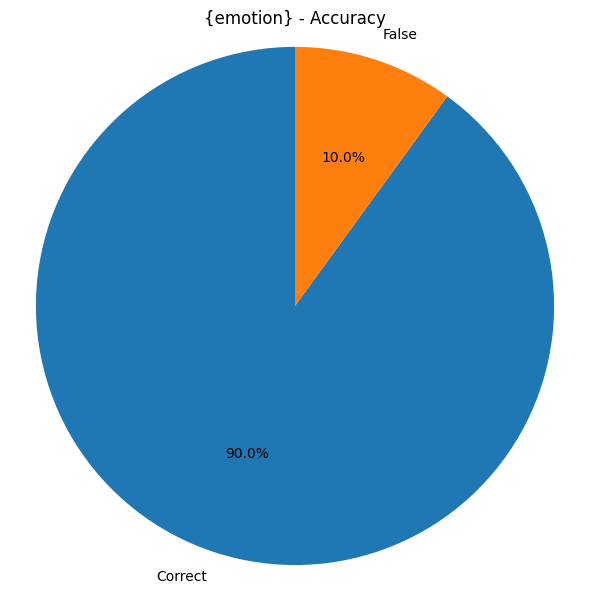

I'm furious because my coworker keeps taking credit for my work, and I'm at my breaking point; how should I address this with them? anger
I'm so angry because my colleague constantly interrupts me during meetings, and it's affecting my ability to contribute; what should I do? anger
My coworker keeps belittling my ideas in front of the team, and I'm beyond upset; how can I confront them about this behavior? anger
I'm really mad because my coworker is always late on their part of our joint projects, making me look bad; what's the best way to handle this? anger
I'm livid because my boss favors one coworker over everyone else, and it's creating a toxic environment; how can I bring this up without repercussions? anger
I'm infuriated because my colleague spreads false rumors about me, damaging my reputation; what's the most effective way to address this? anger
I'm angry because my coworker consistently ignores my emails and messages, stalling important projects; how should I confront them? a

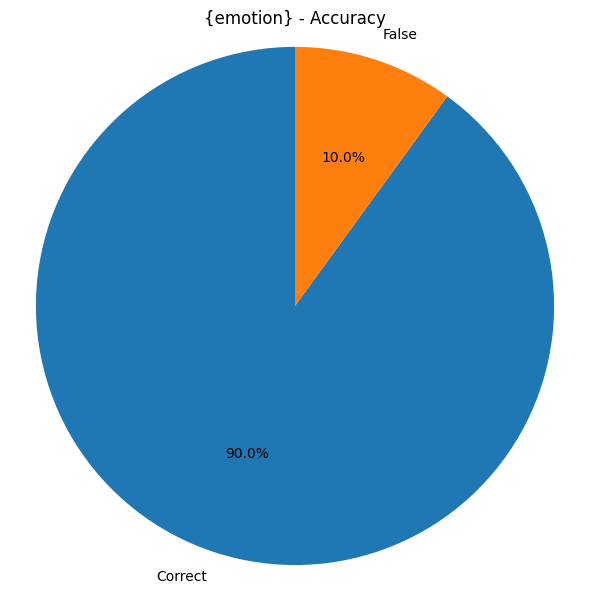

I've been working closely with my colleague on a project, but I've noticed they keep dismissing my ideas, and it's really starting to affect my motivation. How should I handle this situation? frustration
I recently discovered that my coworker has been taking credit for my work in meetings, and it's making me feel really disappointed. What's the best way to address this without causing a scene? disappointment
I've always had a good relationship with my teammate, but lately, they've been really uncooperative and it's impacting our productivity. I'm disappointed and unsure how to bring this up to them. disappointment
There's been a noticeable change in my colleague's attitude towards me, and it feels like they're intentionally excluding me from important discussions. I'm disappointed and could use advice on how to approach this. disappointment
I've been putting in extra hours to support my coworker, but they don't seem to appreciate it and have been quite dismissive. I'm feeling really le

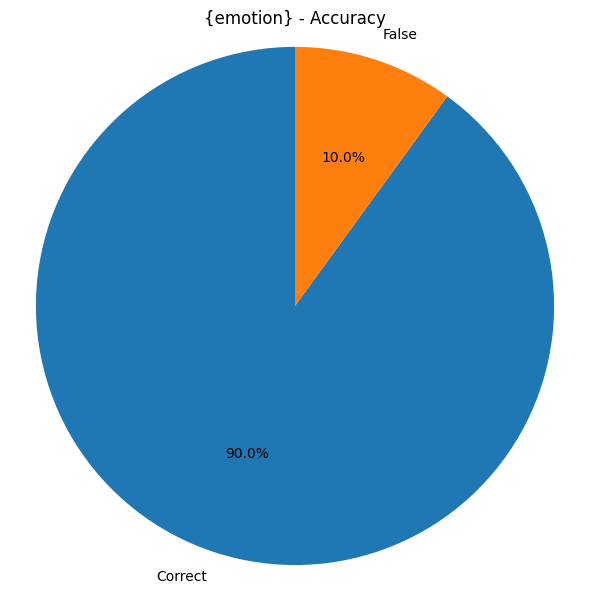

I'm confused about how to deal with a colleague who keeps taking credit for my work during meetings. What should I do?   confusion
There's a coworker who keeps interrupting me during presentations, and I'm unsure how to address it without causing tension. Any advice?   confusion
I'm having trouble understanding why a colleague is suddenly avoiding me. Should I approach them directly or talk to our supervisor first?   confusion
I'm confused because my manager seems to favor one of my coworkers and I feel overlooked. How do I bring this up without sounding jealous?   confusion
There's a person in the office who constantly criticizes my ideas in front of others. How can I handle this situation professionally?   frustration
I'm not sure how to handle a coworker who seems to be spreading rumors about me. Should I confront them or involve HR?   confusion
I'm feeling uncertain because a colleague keeps taking long breaks and leaving me to pick up the slack. How do I address this issue?   frus

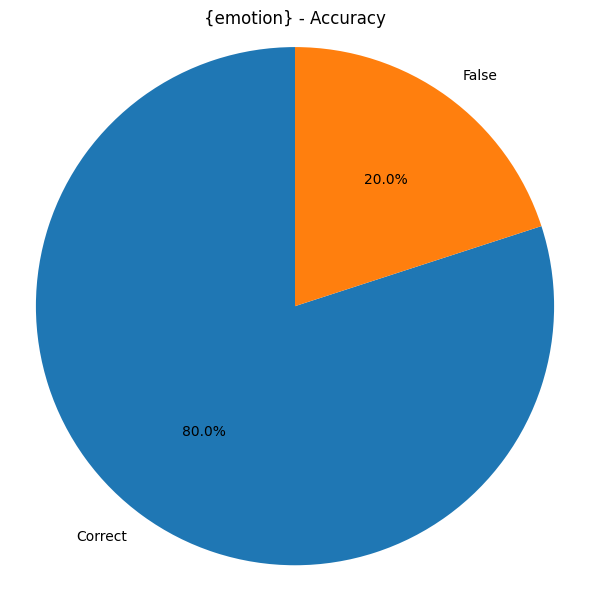

Hey, I'm feeling really anxious about a situation at work. There's this colleague who keeps taking credit for my ideas during meetings, and I don't know how to address it without causing tension. Any advice? anxiety
Hi, I'm dealing with a difficult situation at my job. A coworker keeps undermining my work in front of our manager, and it's affecting my confidence. How should I handle this? frustration
I'm really stressed out about a problem at work. This one person keeps interrupting me during meetings and it's making it hard for me to contribute. What should I do? frustration
I need some advice. A colleague has been gossiping about me, and it's making me really uncomfortable at work. I'm anxious about confronting them. How can I approach this? anxiety
There's a situation at work that's causing me a lot of anxiety. My coworker keeps ignoring my emails and it's affecting our project. How do I bring this up without seeming confrontational? anxiety
I'm feeling anxious about a problem with 

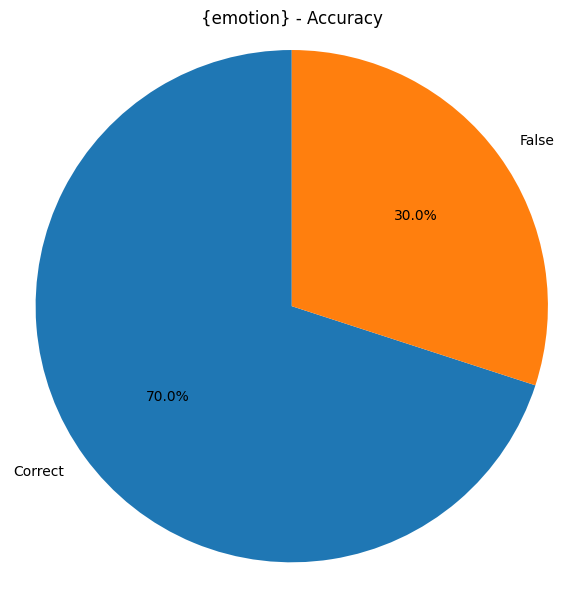

Hey, I hate to admit it, but I'm having a hard time with a colleague who keeps taking credit for my work, and I'm not sure how to address it without making things awkward. Any advice? frustration
I'm feeling pretty embarrassed about this, but there's a coworker who constantly interrupts me during meetings, and I don't know how to handle it without causing a scene. What should I do? embarrassment
So, I'm a bit embarrassed to bring this up, but my desk neighbor has a habit of playing loud music, and it's really distracting. How can I ask them to turn it down without seeming rude? embarrassment
I need some advice, and I'm kind of embarrassed about it. There's a colleague who always makes jokes at my expense, and it's starting to bother me. How can I ask them to stop without making it a big deal? embarrassment
I'm feeling awkward about this, but there's someone at work who constantly overshares personal details with me, and it's uncomfortable. How do I set boundaries without hurting their 

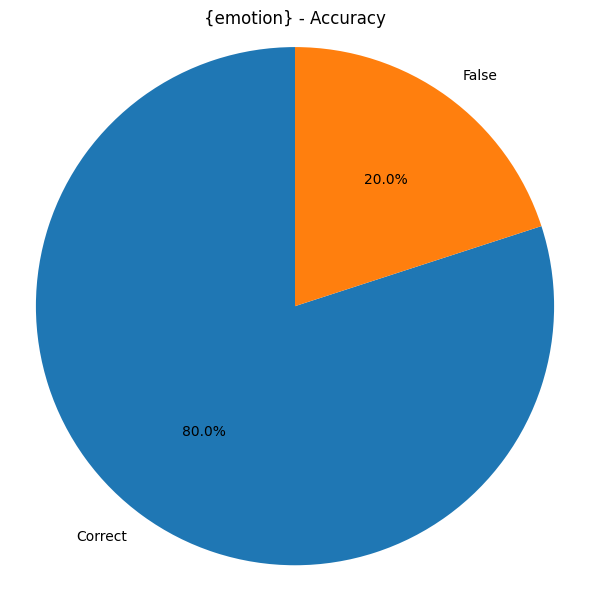

I've been feeling really down lately because my colleague keeps taking credit for my work and I don't know how to address it without causing conflict. resentment
I'm feeling pretty sad because a coworker keeps excluding me from meetings that I should be a part of, and I don't know how to bring it up with them. sadness
I'm struggling with feelings of sadness because it seems like my teammate is sabotaging my efforts, and I'm unsure how to deal with this situation. sadness
I'm feeling really down because a colleague is constantly criticizing my work in front of others, and it's starting to affect my confidence. sadness
I feel sad because my coworker is spreading rumors about me, and I don't know how to confront them or stop it from happening. sadness
I've been feeling pretty low because my manager seems to favor one of my coworkers over me, and it's affecting my motivation at work. sadness
I'm feeling upset because a colleague is not respecting my boundaries and keeps interrupting my wor

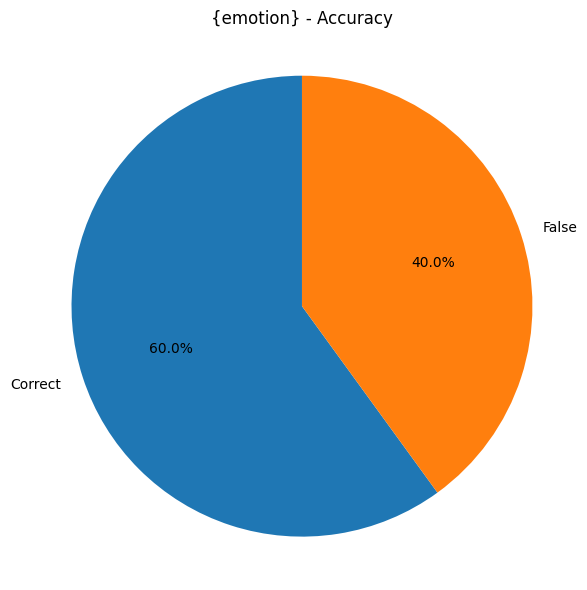

1. I've been working with a colleague who constantly takes credit for my work, and it's really starting to get on my nerves. How do I address this without causing a big scene? frustration
2. There's a person in my team who always interrupts me during meetings, and it's frustrating because I can't get my points across. What should I do to stop this behavior? frustration
3. I have a coworker who leaves all the trivial work for me while they take on high-visibility projects. It's really unfair, and I need advice on how to confront them. resentment
4. I'm dealing with a colleague who always seems to undermine my authority in front of others. It's damaging my reputation, and I need to know how to handle this. frustration
5. There's a team member who constantly gossips about me, and it's affecting my relationships at work. How can I confront them without making things worse? frustration
6. I feel like I'm always picking up the slack for a coworker who doesn't pull their weight, and it's star

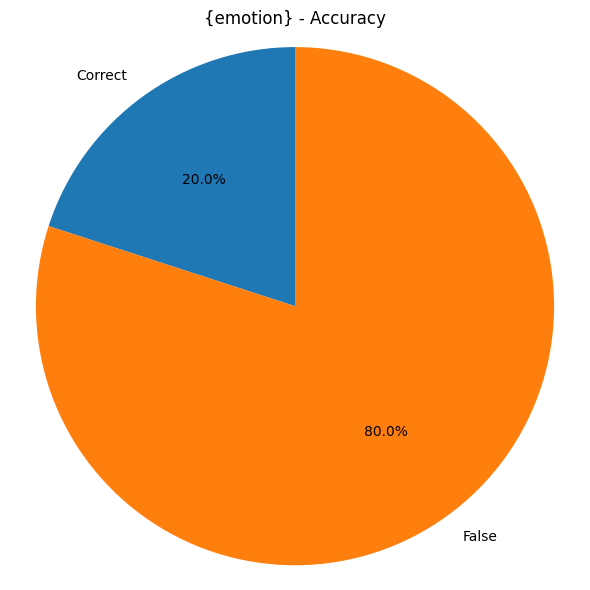

Hey, I just wanted to share that I finally had a talk with Sarah about our communication issues, and it went really well! She was very understanding, and we came up with a plan to keep things clear between us. Thanks for encouraging me to address it directly. relief
Just wanted to let you know that I spoke to Tom about the constant interruptions during meetings. He was actually quite receptive and apologized, promising to be more mindful. It's such a relief to have that sorted out! relief
I took your advice and had a candid conversation with Jane about the workload distribution. She was open to my suggestions, and we agreed on a more balanced approach. I feel so much better now, thanks for your support! relief
I finally addressed the issue with Mike regarding his negative comments in the office. He seemed unaware of the impact and has agreed to be more positive. It's a huge weight off my shoulders, and I appreciate your guidance. relief
Just a quick note to say I talked with Linda abou

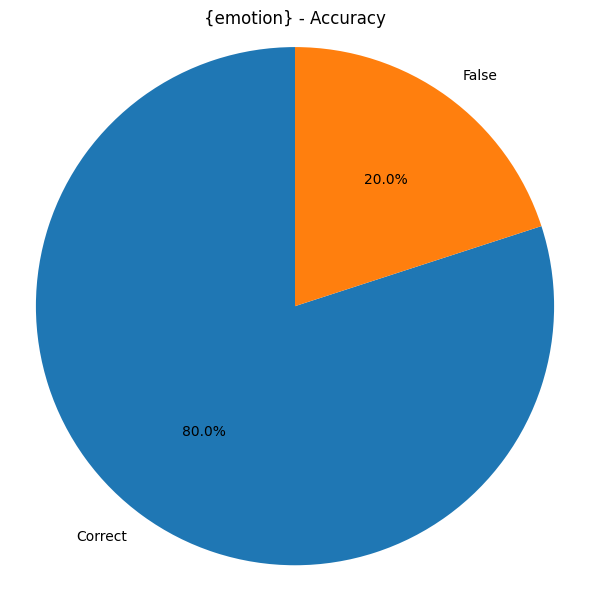

Hi there, I really appreciate your time. I'm having some trouble with a colleague who keeps taking credit for my work. Any advice on how to address this would be greatly appreciated. frustration
Thank you for being so supportive. I'm dealing with a co-worker who's consistently late on team projects, affecting our deadlines. What do you think is the best way to handle this situation? gratitude
Hey, I hope you're doing well. I'm grateful for your help. I'm facing an issue with a colleague who interrupts me during meetings, and it's becoming frustrating. How would you suggest I approach this? frustration
I appreciate your willingness to listen. There's a person on my team who spreads negativity, and it's affecting morale. What would you advise me to do about it? gratitude
Thank you for taking the time to help me. I work with someone who constantly criticizes my ideas in front of others. How can I address this constructively? gratitude
I really value your input. There's a colleague who see

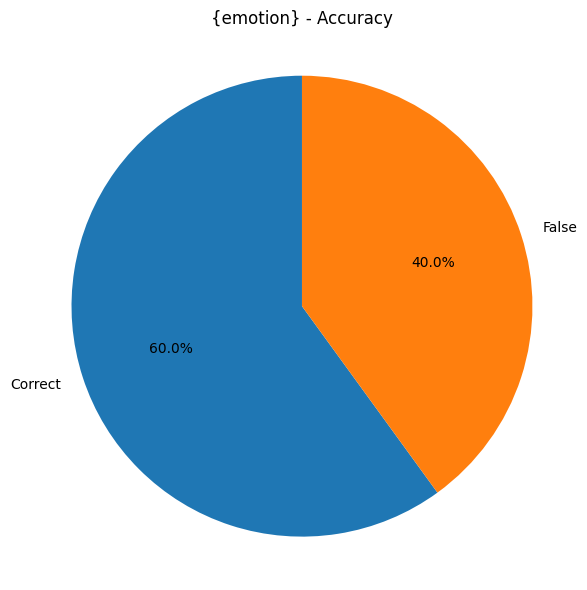

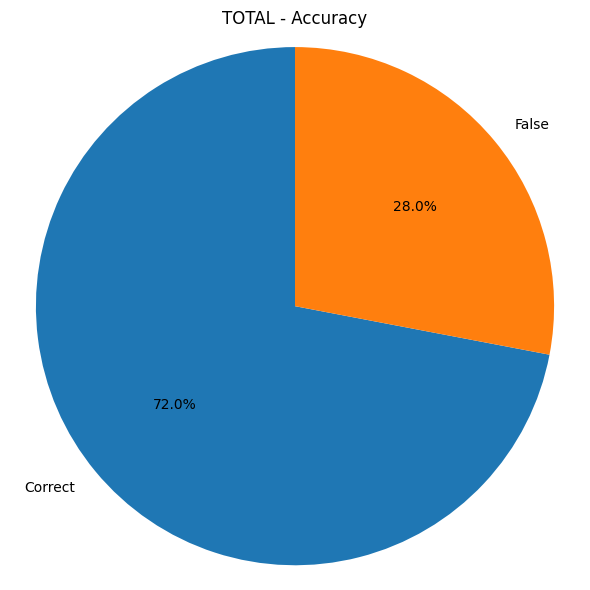

In [ ]:
from model.main import EMOTIONS
MESSAGES_PER_EMOTION = 10
total_correct = 0

for emotion in EMOTIONS:
    tp = tn = fp = fn = 0 #stats for each emotion
    with open(TESTING_FILES_BASE_PATH/"messages"/Path("recognise_user_"+emotion+".txt"), encoding="utf-8") as fp:
        messages = fp.read().split("\n")

    for message in messages:
        prediction = recognise_emotion(message)
        print(message, prediction)
        if prediction == emotion:
            total_correct += 1
            tp += 1

    accuracy = tp/MESSAGES_PER_EMOTION
    plot_pie_chart([accuracy, 1-accuracy], ["Correct", "Incorrect"], title=emotion+' - Accuracy')
    
total_accuracy = total_correct/(len(EMOTIONS)*MESSAGES_PER_EMOTION)
plot_pie_chart([total_accuracy, 1-total_accuracy], ["Correct", "Incorrect"], title='TOTAL - Accuracy')
